# Investigating Root-finding algorithms

## The Bisection algorithm

The following code was used to define one step of the Bisection method:

In [84]:
from numpy import sign
def bisection_step(f, bounds):
    """Performs one step of the bisection algorithm to locate a root of f, 
    and returns a smaller range in which the root is found.
    
    f: function of a single variable with a root within bounds
    bounds: tuple of two numbers representing the range to search for the root"""

    lower, upper = bounds   # "Unpack" the tuple so that we can manipulate the lower and upper bound separately
    middle = (lower + upper)/2 # Calculate the midpoint
    
    if sign(f(lower)) != sign(f(middle)):
        return (lower, middle)
    else:
        return (middle,upper)

The following code was used to iterate the bisection method so as to get as close as possible to the root:

In [85]:
def bisection_step_iterator(a,x,y):
    print("{:^15}  {:^15}  {:^15}".format("lower", "upper", "difference"))

    count = 0 # Counter starts at zero.
    l, u = x,y
    while u-l > 10**-8:
        count += 1       # One is added to the counter every time the loop is initiated.
        l, u = bisection_step(a, (l, u)) 
    print("{:15.12f}  {:15.12f}  {:15.12f}".format(l, u, u-l)) #prints out three values of 15 characters and 12 dp.
    print("number of iterations = {:d}".format(count))

### Functions that the all the root finding algorithms will be tested on:

In [86]:
def g(x):
    return (x**8) - (2*x) - 1

def h(x):
    return (x-1)/(x-2)

def j(x):
    return (x**3) + (47*x**2) - (148*x) + 90

def k(x):
    return (x**4) - (8*x**3) + (22*x**2) - (24*x) + 9

### Plot of all those functions:

<IPython.core.display.Javascript object>


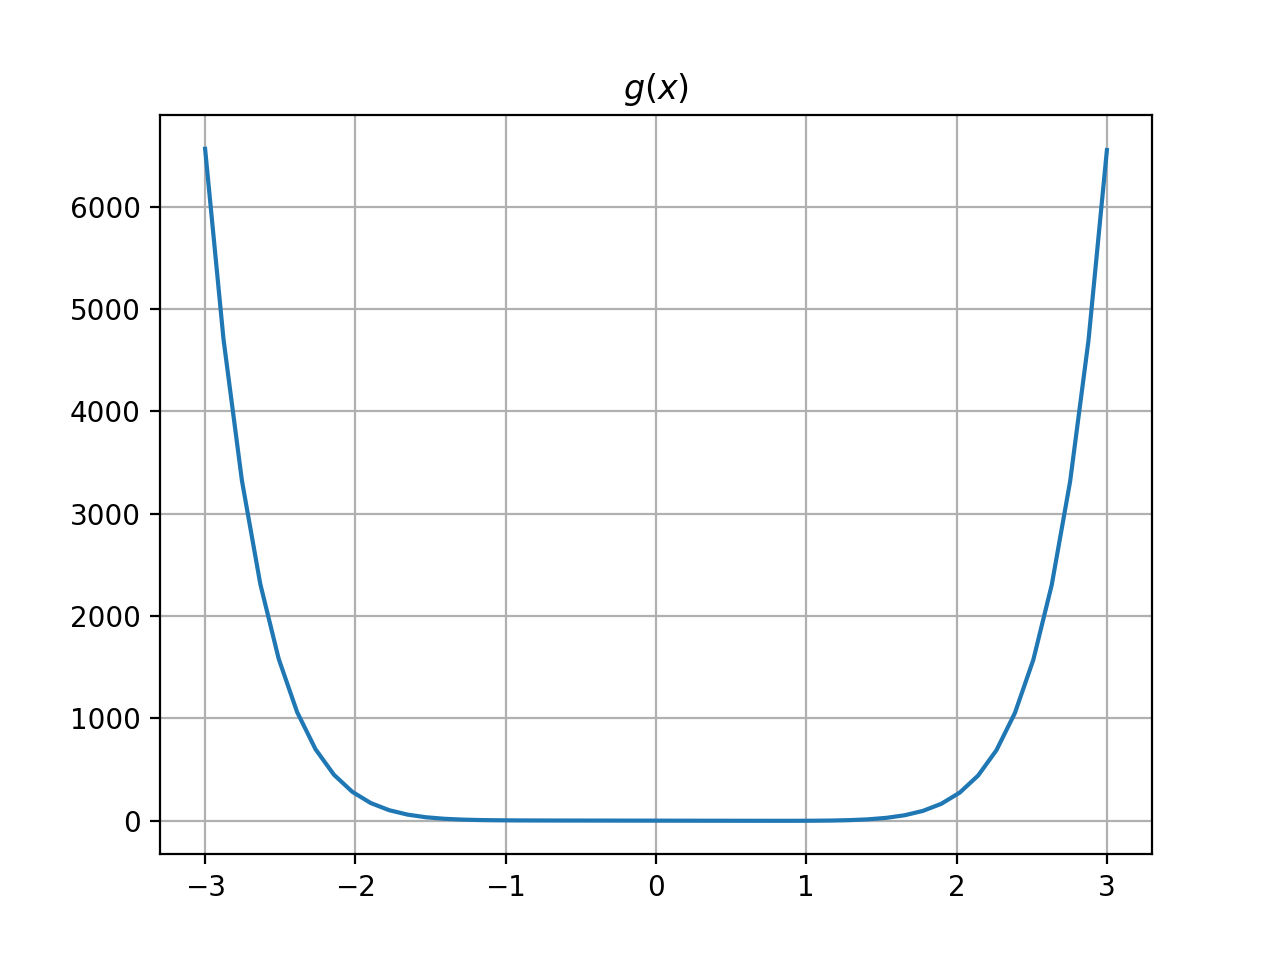

In [87]:
%matplotlib notebook
from matplotlib.pylab import figure, plot, grid, title
from numpy import linspace

xg = linspace(-3,3) #defining the x points to plot.

figure() # creating the figure
grid() # adding a grid
title('$g(x)$') # giving a title
plot(xg,g(xg))

<IPython.core.display.Javascript object>


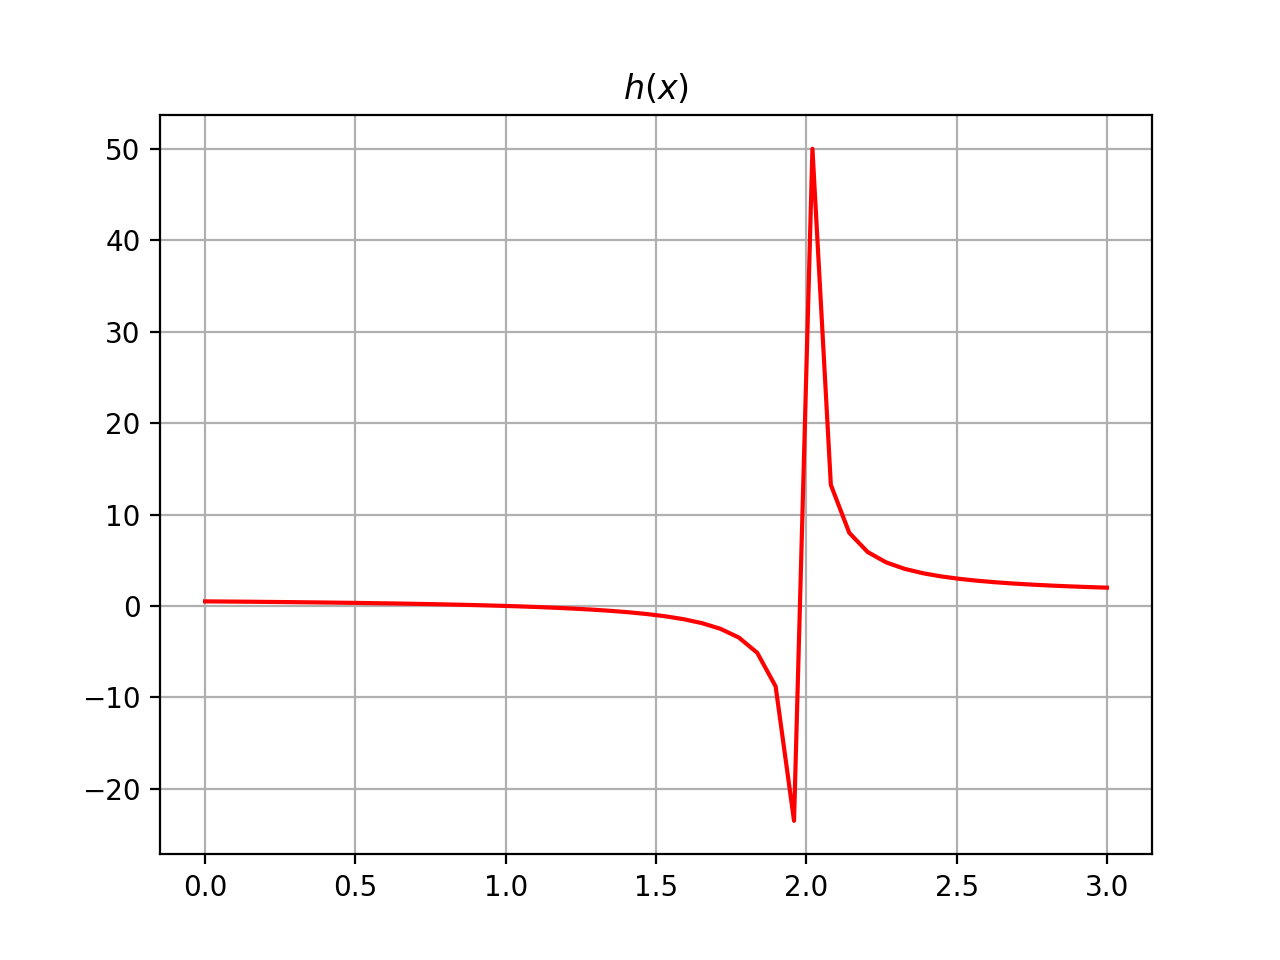

In [88]:
xh = linspace(0,3)
figure()
grid()
title('$h(x)$')
plot(xh,h(xh),'r')

<IPython.core.display.Javascript object>


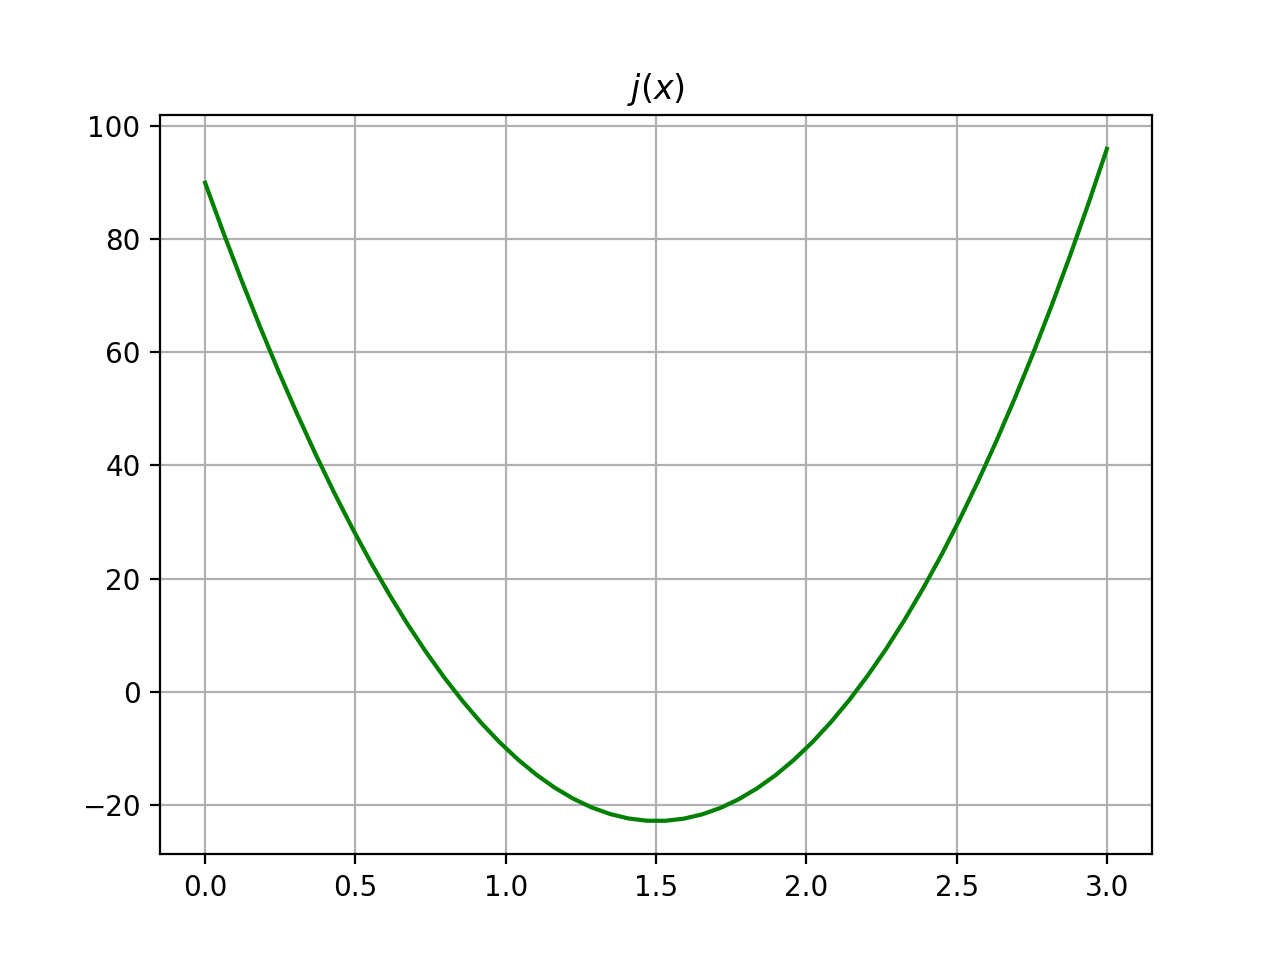

In [89]:
xj = linspace(0,3)
figure()
grid()
title('$j(x)$')
plot(xj,j(xj),'g')

<IPython.core.display.Javascript object>


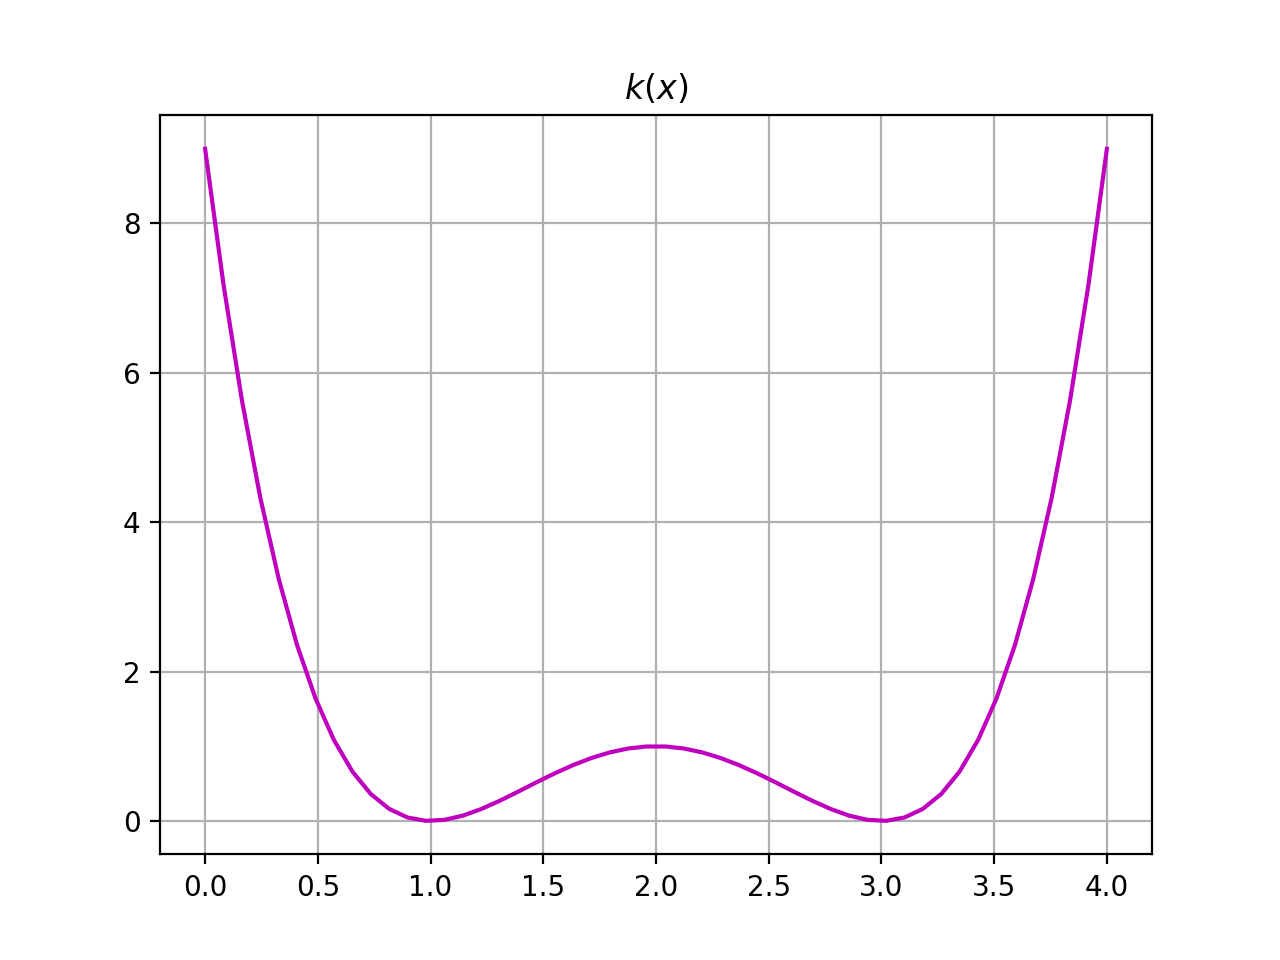

In [90]:
xk = linspace(0,4)
figure()
grid()
title('$k(x)$')
plot(xk,k(xk),'m')

#### Now the bicestion method will be tested on each of the given functions and all roots visible on the plot will be attempted to be calculated.

*g(x)*

In [91]:
bisection_step_iterator(g,-3,3)
bisection_step_iterator(g,0,3)
bisection_step_iterator(g,-0.6,-0.4) # same root but smaller range.

     lower            upper         difference   
-0.498105308041  -0.498105302453   0.000000005588
number of iterations = 30
     lower            upper         difference   
 1.162004392594   1.162004398182   0.000000005588
number of iterations = 29
     lower            upper         difference   
-0.498105305433  -0.498105299473   0.000000005960
number of iterations = 25


*h(x)*

In [92]:
bisection_step_iterator(h,0,3) #over the whole range finds the correct root
bisection_step_iterator(h,1.5,2) #if given the specific range given then it will find a root that doesn't exist.

     lower            upper         difference   
 0.999999996275   1.000000001863   0.000000005588
number of iterations = 29
     lower            upper         difference   
 1.999999992549   2.000000000000   0.000000007451
number of iterations = 26


*j(x)*

In [93]:
bisection_step_iterator(j,0,3) # over whole range finds one of the roots. To be expected as root found depends on range.
bisection_step_iterator(j,1.5,2.5) # given the correct range finds the right root.

     lower            upper         difference   
 0.831622911617   0.831622917205   0.000000005588
number of iterations = 29
     lower            upper         difference   
 2.164605788887   2.164605796337   0.000000007451
number of iterations = 27


##### Large range test

In [94]:
bisection_step_iterator(j,0,300)
bisection_step_iterator(j,-300,3)

     lower            upper         difference   
299.999999991269  300.000000000000   0.000000008731
number of iterations = 35
     lower            upper         difference   
-49.996228710457  -49.996228701639   0.000000008818
number of iterations = 35


Testing continued:

*k(x)*

In [95]:
bisection_step_iterator(k,0.5,1.5)
bisection_step_iterator(k,0,4)

     lower            upper         difference   
 0.999999977648   0.999999985099   0.000000007451
number of iterations = 27
     lower            upper         difference   
 2.999999947846   2.999999955297   0.000000007451
number of iterations = 29


### Which functions does the Bisection method work for?

The Bisection method works for all 4 functions demonstrated [above](#Functions-that-the-all-the-root-finding-algorithms-will-be-tested-on:).

### Can you predict how many iterations it will require?

From all the [tests](#Now-the-bicestion-method-will-be-tested-on-each-of-the-given-functions-and-all-roots-visible-on-the-plot-will-be-attempted-to-be-calculated.) we can see that the bisection algorithm calculates the root within 25-35 iterations. This can be seen in the large range [test](#Large-range-test) as even though the range is very large it only takes about 6 more iterations than normal.

### Is it possible that it will not converge?

For the bisection algorithm, on the functions it was tested on, it did converge every time even it wasn't the right root.

### Is it possible that it will converge, but not to the nearest root?

This is assuming you have picked your range properly. Take for example function [$g(x)$](#Plot-of-all-those-functions:) it clearly has two roots however as you can [see](#Now-the-bicestion-method-will-be-tested-on-each-of-the-given-functions-and-all-roots-visible-on-the-plot-will-be-attempted-to-be-calculated.) if the whole range is given then it will find only one of the roots as expected as when the lower and upper bounds subtract the initial subtraction will skip over one of the roots and it will only converge on that root. However, if you specify a range where only one root is present then it will converge to the correct root. For the bisection algorithm, on the functions it was tested on, it did converge every time even it wasn't the right root.

### Is it possible that it will converge to a value that is not a root?

As seen in the large range [test](#Large-range-test) if the range is too large then it will just converge to some other value that is not the root. This is dependant on the range given. Take for example the first test in the large range test from $0-300$. What happens is that because the sign of j(lower) and j(middle) is not different then the middle and upper value is returned. The middle value is $150$ and the upper is $300$ so therefore the root which is present near zero is skipped over so the actual root is no longer in range and the function just converges to some other value. Because of the way $h(x)$ is plotted by python if a specific enough range is given to the bisection method then it will find a root which does not exist but is shown on the plot.

### Is it possible that there is a root within the initial range that it does not find?

As mentioned above if the range is large enough then because of how this method works after the first step the actual range of the root is skipped over if the signs are not different and if the range is large the returned $(middle, upper)$ value will be outside the range of the root.

## The *Regula Falsi* Algorithm

The following code was used to define a single step of the *Regula Falsi* method:

In [96]:
def regula_falsi_step(f, bounds):
    """Performs one step of the regula falsi algorithm to locate a root of f, 
    and returns a smaller range in which the root is found.
    
    f: function of a single variable with a root within bounds
    bounds: tuple of two numbers representing the range to search for the root"""
    
    lower, upper = bounds # Unpacking tuples
    middle = (lower*f(upper) - upper*f(lower))/(f(upper) - f(lower)) #calculting intersect.
    
    while f(lower)*f(middle) < 0:
        return (lower,middle)
    else:
        return (middle,upper)

The following code was used to iterate the regula_falsi_step function so that it can converge to the root:

In [97]:
def regula_falsi_step_iterator(a,x,y):
    print("{:^15}  {:^15}  {:^15}".format("lower", "upper", "difference"))

    count = 0 
    l, u = x, y # Starting range
    while abs(a(l)) > 1e-8:
        count += 1
        l, u = regula_falsi_step(a, (l, u)) 
        # This format string prints out three values, each with width 15 characters and 12 decimal places
    print("{:15.12f}  {:15.12f}  {:15.12f}".format(l, u, u-l))
    print("number of iterations = {:d}".format(count))

**The functions that this method was tested on can be seen [here](#Functions-that-the-all-the-root-finding-algorithms-will-be-tested-on:) and a plot of all those functions can be seen [here](#Plot-of-all-those-functions:).**

###### Now the method will be tested accordingly for every function:

*g(x)*

In [98]:
regula_falsi_step_iterator(g,0,3) #lots of iterations. 
regula_falsi_step_iterator(g,-0.6,-0.4) #Many less iterations then bisection.

     lower            upper         difference   
 1.162004393860   3.000000000000   1.837995606140
number of iterations = 4893
     lower            upper         difference   
-0.498105304862  -0.498105304862   0.000000000000
number of iterations = 11


#### Large range test for *regula falsi*

In [99]:
regula_falsi_step_iterator(g,0,7) #1 million+ iterations!

     lower            upper         difference   
 1.162004393859   7.000000000000   5.837995606141
number of iterations = 1453783


Testing continued:

*h(x)*

In [100]:
regula_falsi_step_iterator(h,0,1.5) #Finds root similar iterations to bisection since iterations go up exopnentially.
regula_falsi_step_iterator(h,0,2.1) #for certain functions its not perfect.
#regula_falsi_step_iterator(h,1.9,2.1) even though root is present in graph will not find it because of zero error.

     lower            upper         difference   
 0.999999992549   1.500000000000   0.500000007451
number of iterations = 27
     lower            upper         difference   
           -inf   2.100000000000              inf
number of iterations = 7423


*j(x)*

In [101]:
regula_falsi_step_iterator(j,0,3) #finds upper root where bisection finds lower root over whole range.
regula_falsi_step_iterator(j,0,1)

     lower            upper         difference   
 2.164605796058   3.000000000000   0.835394203942
number of iterations = 26
     lower            upper         difference   
 0.831622912644   0.831622912644   0.000000000000
number of iterations = 35


*k(x)*

In [102]:
regula_falsi_step_iterator(k,0,3.5) #convereges to value but not that accurately.
regula_falsi_step_iterator(k,0.5,1.5) #small range but not accuarte value of root and also alot of iterations.

     lower            upper         difference   
 3.000049997337   3.500000000000   0.499950002663
number of iterations = 15624
     lower            upper         difference   
 1.000050000675   1.500000000000   0.499949999325
number of iterations = 5626


### Which functions can these algorithms be applied to?

*Regula Falsi* cannot be applied to every function that it is being applied to in this test. The function that it does not work for is $h(x)$. Even though the algorithm does find the true correct root, the other root present because of the way python plots functions is not found by the algorithm and $-inf$ is returned instead. However, if the range is narrowed down enough has shown above, the root is found, however, the function returns a zero error as the root it finds is the asymptote.

### Can you predict how many iterations they will require?

It is difficult to predict the number of iterations as it is very dependant on the function and the range given. For example, for $g(x)$ for a given range of $0-3$ the number of iterations is 4893 and for $j(x)$ it is 26 for the same range. Furthermore, in extreme cases like in the large(relatively) range [test](#Large-range-test-for-regula-falsi) for $g(x)$ from $0-7$ the number of iterations were over 1 million. In comparison to the bisection method for which a range of over 40 times larger only iterated 35 times even if it did not converge to the correct root. This is also true for smaller ranges as seen with $g(x)$ as when the range is really specific it can be calculated in only 11 iterations. However, with $k(x)$ with a range of only 1 it took over 5000 iterations.

### Is it possible that they will not converge?

It is possible it will not converge in the case if there is an asymptote present or it will converge but will take to many iterations for it to be feasible. For the first case this is because the way the intersect is found involves having the value passed into the function and if the function has an asymptote then like in the case of $h(x)$ a zero error will be returned. For the second case, it depends on the shape of the function as the more "straight" the function in the given range the more iterations it will take as the intersection will still be close to the upper value of the range given.

### Is it possible that they will converge, but not to the nearest root?

In the case of this algorithm, it always converges to the root closest to the upper range. So whichever root is closest to the upper range it will converge too. For example for $j(x)$ even though there are two roots present in the range of $0-3$ the root closest to 3 was found first and then for the range of $0-1$ the other root which is closer to 1 was found. So, therefore, this algorithm does converge to the nearest root to the upper side.

### Is it possible that they will converge to a value that is not a root?

For the functions this algorithm was tested on there was not any function where the algorithm converged to a value that was not the root. However, in the case of $k(x)$ sometimes it will converge to a value not as accurate as the bisection method.

### Is it possible that there is a root within the initial range that they do not find?

For all the functions tested on the algorithm there was no particular function where the algorithm could not find a root in the initial range. However, there was an exception where for $k(x)$ depending on the range provided so if $0-2$ or $0-4$ because of the function and the way this algorithm calculates the intersect it runs into a zero division error, say for the range 0 to 4, $k(4)-k(0) = 0$. Other then this there were no other issues for finding the root in the range.

## The Newton-Raphson Alogrithm

The following code was used to define step one of the Newton-Raphson method:

In [103]:
def newton_step(f, fp, x0):
    """Perform one step of the Newton-Raphson algorithm."""
    x1 = x0 - f(x0)/fp(x0)
    return x1

The following code was used iterate through the algorithm to allow it to converge to a root:

In [104]:
def newton_step_iterator(f1,f2,x0,x1):
    x = x0
    previous_value = x1 # Usually given as 1 unless x = 1.
    count = 0
    while abs(previous_value - x) > 10**-8:
        count += 1
        previous_value = x
        x = newton_step(f1,f2,previous_value)
    return x, count

**In addition to the [functions](#Functions-that-the-all-the-root-finding-algorithms-will-be-tested-on:) that were tested on the previous two algorithms and their respective [plots](#Plot-of-all-those-functions:) this algorithm will be tested on new functions given below and will also be plotted.**

In [105]:
from numpy import cos, tan , sin , sqrt, vectorize

def f(x):
    return tan(x) - x

def m(x):
    return cos(x)

def n(x):
    return (x**3) - (2*x) + 2

def p(x):
    if x >= 0:
        return sqrt(x)
    else:
        return -sqrt(-x)
p = vectorize(p)

Because of how this algorithm works it also requires the derivates of each function so the derivatives of the initially defined functions and the newly defined functions will be given below:

In [106]:
def g_prime(x):
    return (8*x**7) - 2

def h_prime(x):
    return -1/((x-2)**2)

def j_prime(x):
    return (3*x**2) + (94*x) - 148

def k_prime(x):
    return (4*x**3) - (24*x**2) + (44*x) - 24

def sec_squared(x):
    secx = 1/cos(x)
    return secx**2

def m_prime(x):
    return -sin(x)

def n_prime(x):
    return (3*x**2) - 2

def p_prime(x):
    if x >= 0:
        return 1/(2*sqrt(x))
    else:
        return 1/(2*sqrt(-x))
p_prime = vectorize(p_prime)

### Plots of the new functions:

<IPython.core.display.Javascript object>


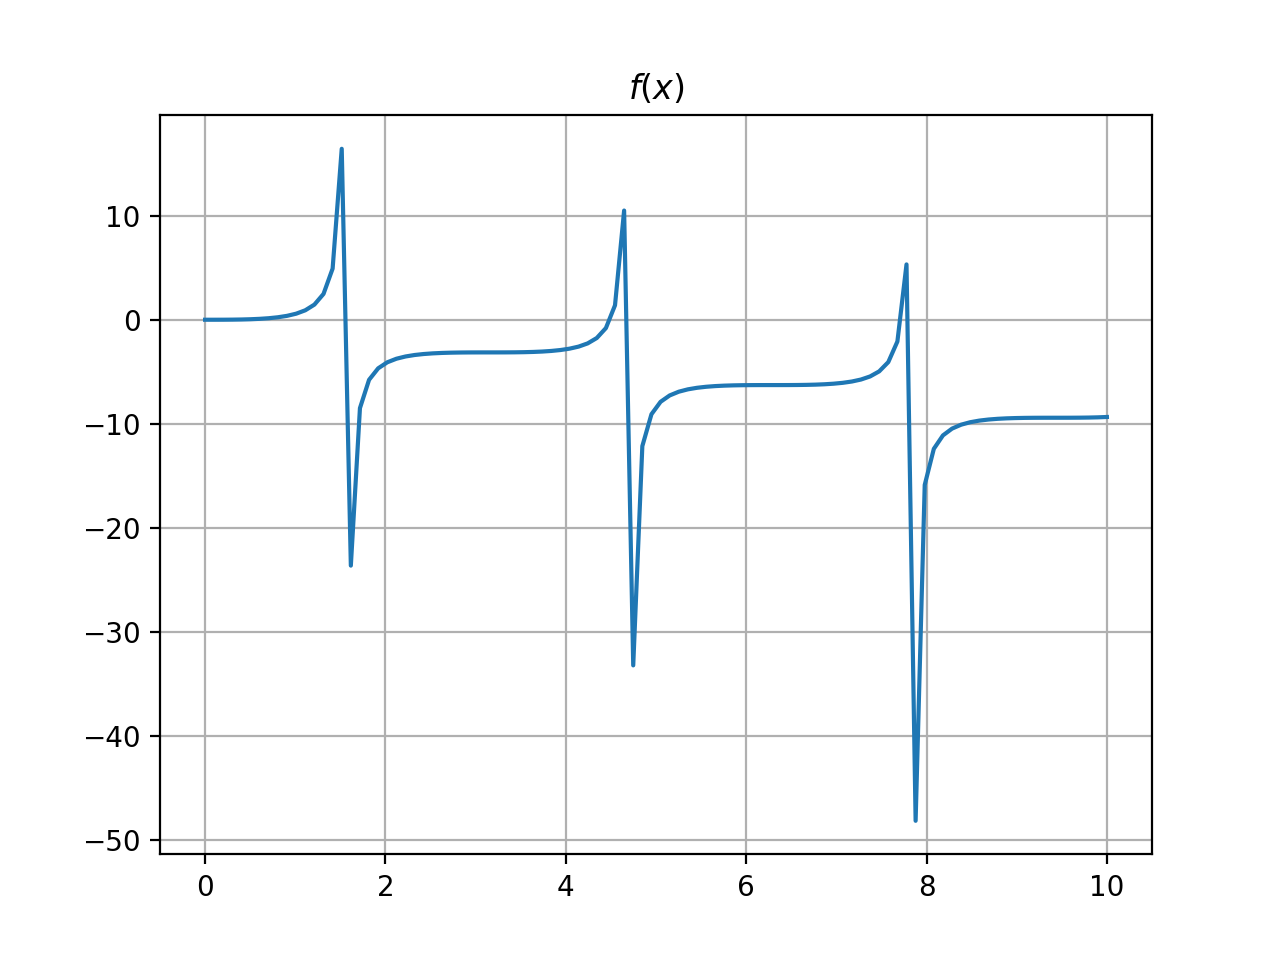

In [107]:
xf = linspace(0,10,100) # more points specified for a more smoother plot.
figure()
grid()
title('$f(x)$')
plot(xf,f(xf))

<IPython.core.display.Javascript object>


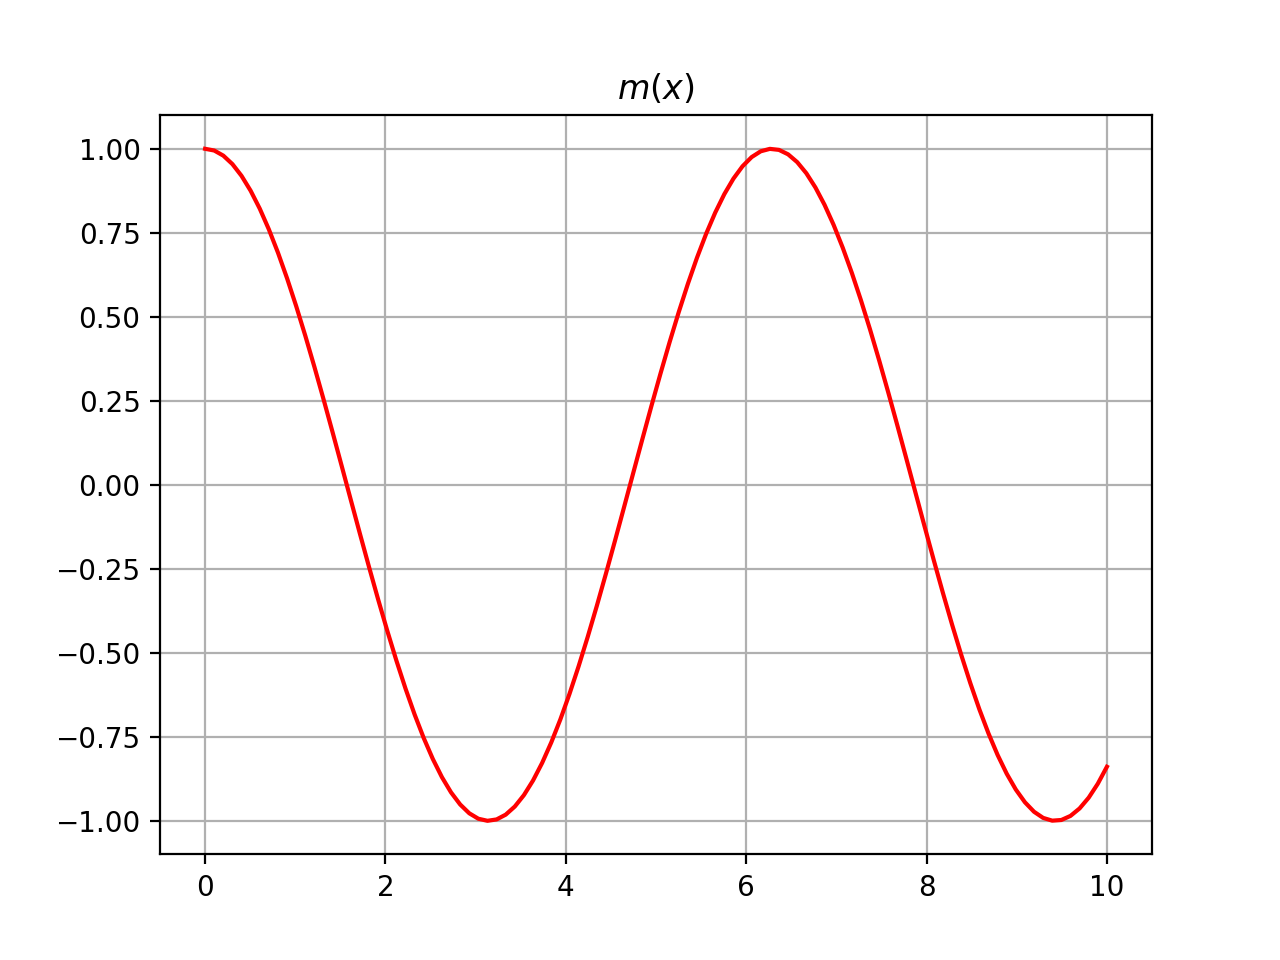

In [108]:
xm = linspace(0,10,100)
figure()
grid()
title('$m(x)$')
plot(xm,m(xm),'r')

<IPython.core.display.Javascript object>


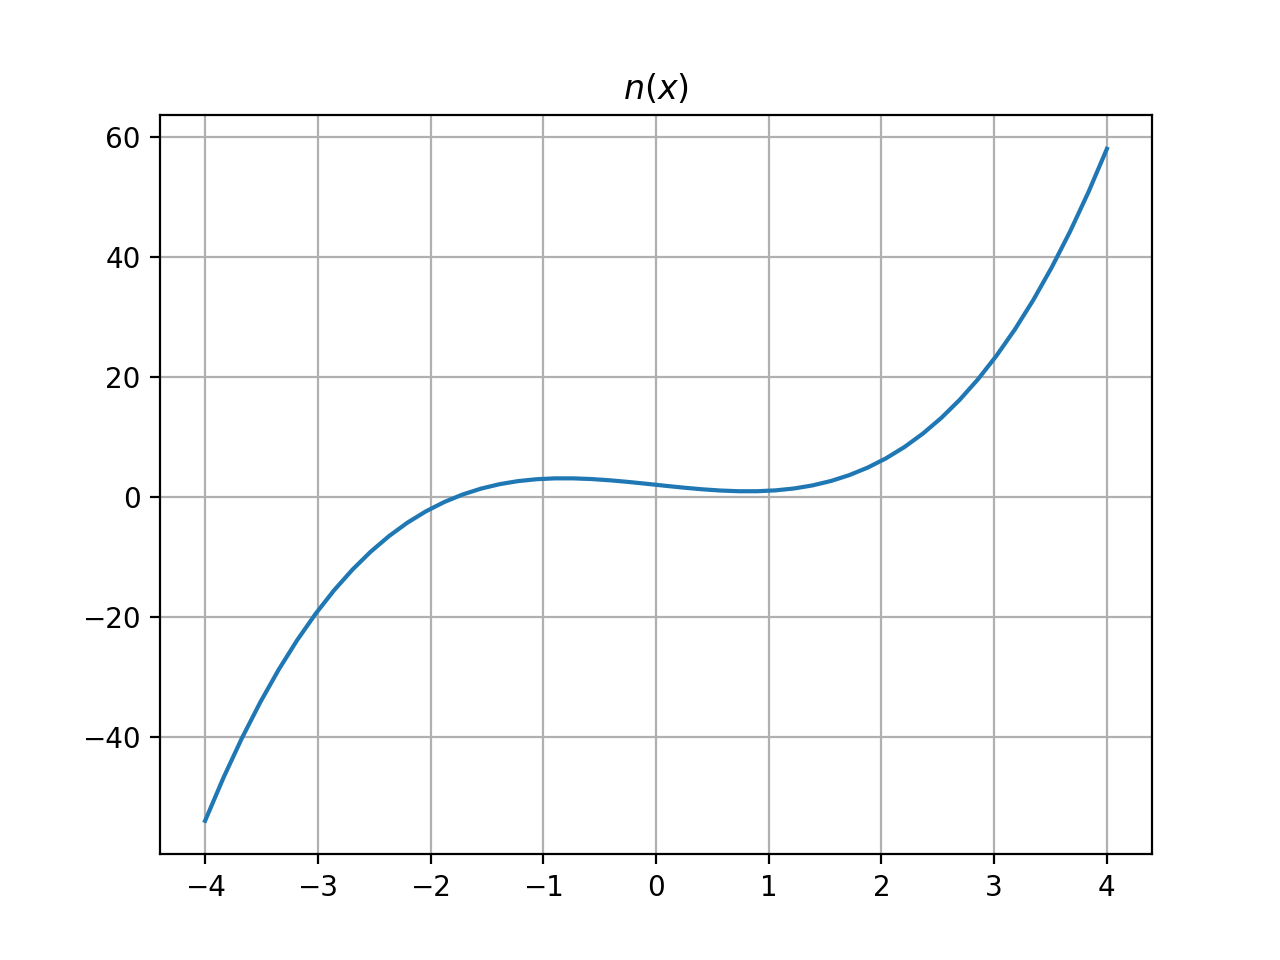

In [109]:
xn = linspace(-4,4)
figure()
grid()
title('$n(x)$')
plot(xn,n(xn))

<IPython.core.display.Javascript object>


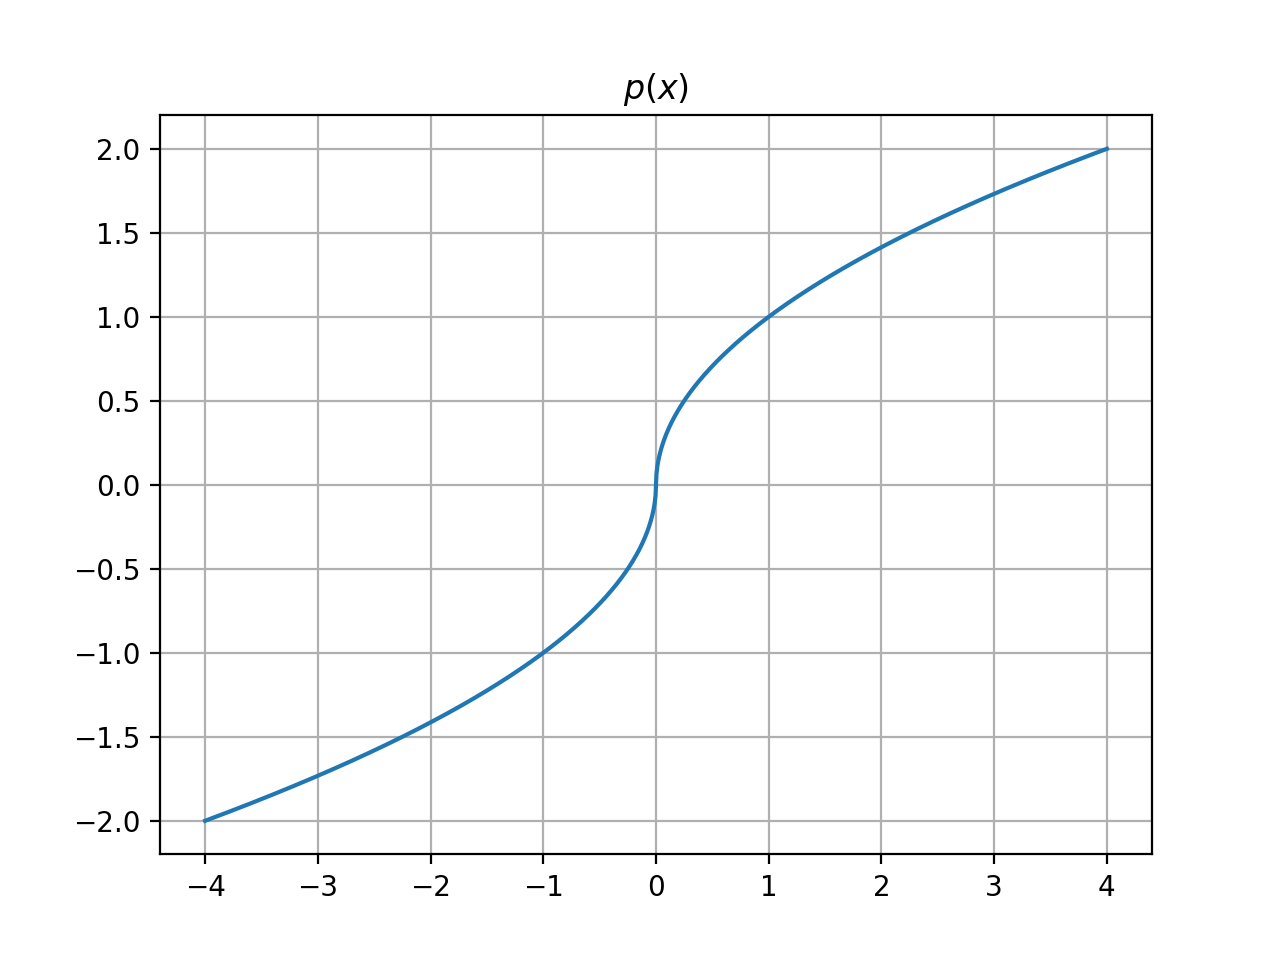

In [110]:
xp = linspace(-4,4,1000)
figure()
grid()
title('$p(x)$')
plot(xp,p(xp))

##### Now all the functions will be tested on this algorithm:

*g(x)*

In [111]:
print("Positive root = {}, which took {} iterations".format(newton_step_iterator(g,g_prime,3,1)[0],newton_step_iterator(g,g_prime,3,1)[1]))
print("Negative root = {}, which took {} iterations".format(newton_step_iterator(g,g_prime,-3,1)[0],newton_step_iterator(g,g_prime,-3,1)[1]))

Positive root = 1.1620043943375657, which took 12 iterations
Negative root = -0.4981053048624491, which took 14 iterations


*h(x)*

In [112]:
print("Positive root = {}, which took {} iterations".format(newton_step_iterator(h,h_prime,1.5,1)[0],newton_step_iterator(h,h_prime,1.5,1)[1]))
#only works in the range of 0<x<2. Outside of that range either zero error or "Result too large".

Positive root = 1.0, which took 6 iterations


*j(x)*

In [113]:
print("Positive root = {}, which took {} iterations".format(newton_step_iterator(j,j_prime,3,1)[0],newton_step_iterator(j,j_prime,3,1)[1]))
print("Positive root = {}, which took {} iterations".format(newton_step_iterator(j,j_prime,0,1)[0],newton_step_iterator(j,j_prime,0,1)[1]))

Positive root = 2.1646057959235065, which took 6 iterations
Positive root = 0.831622912644296, which took 6 iterations


*k(x)*

In [114]:
print("Positive root = {}, which took {} iterations".format(newton_step_iterator(k,k_prime,4,1)[0],newton_step_iterator(k,k_prime,4,1)[1]))
print("Positive root = {}, which took {} iterations".format(newton_step_iterator(k,k_prime,0,1)[0],newton_step_iterator(k,k_prime,0,1)[1]))

Positive root = 3.000000002079043, which took 40 iterations
Positive root = 1.0000000005556597, which took 29 iterations


*f(x)*

In [115]:
print("Positive root = {}, which took {} iterations".format(newton_step_iterator(f,sec_squared,4.5,1)[0],newton_step_iterator(f,sec_squared,4.5,1)[1]))
print("Positive root = {}, which took {} iterations".format(newton_step_iterator(f,sec_squared,1.5,1)[0],newton_step_iterator(f,sec_squared,1.5,1)[1]))
print("Positive root = {}, which took {} iterations".format(newton_step_iterator(f,sec_squared,3,1)[0],newton_step_iterator(f,sec_squared,3,1)[1]))
#not a root close to 3.
print("Positive root = {}, which took {} iterations".format(newton_step_iterator(f,sec_squared,1,2)[0],newton_step_iterator(f,sec_squared,1,2)[1]))

Positive root = 4.493409458028389, which took 6 iterations
Positive root = 0.003107218575526461, which took 155368 iterations
Positive root = 45.531134013991306, which took 12 iterations
Positive root = 0.0031072189496483887, which took 155364 iterations


#### Overflow error:

In [116]:
newton_step_iterator(f,sec_squared,2,1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in tan
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in cos
  


(nan, 1908)

*m(x)*

In [117]:
print("Positive root = {}, which took {} iterations".format(newton_step_iterator(m,m_prime,0.0001,1)[0],newton_step_iterator(m,m_prime,0.0001,1)[1]))
#finds root but smaller the number the larger the root.
print("Positive root = {}, which took {} iterations".format(newton_step_iterator(m,m_prime,1,2)[0],newton_step_iterator(m,m_prime,1,2)[1]))
print("Positive root = {}, which took {} iterations".format(newton_step_iterator(m,m_prime,1.5,1)[0],newton_step_iterator(m,m_prime,1.5,1)[1]))
#correct root if value close to true value.
print("Negative root = {}, which took {} iterations".format(newton_step_iterator(m,m_prime,3.5,1)[0],newton_step_iterator(m,m_prime,3.5,1)[1]))
#same root as 1.5 starting value but negative instead.

Positive root = 10007.543398010286, which took 8 iterations
Positive root = 1.5707963267948966, which took 4 iterations
Positive root = 1.5707963267948966, which took 3 iterations
Negative root = -1.5707963267948966, which took 7 iterations


*n(x)*

In [118]:
print("Positive root = {}, which took {} iterations".format(newton_step_iterator(n,n_prime,-4,1)[0],newton_step_iterator(n,n_prime,-4,1)[1]))
#print("Positive root = {}, which took {} iterations".format(newton_step_iterator(n,n_prime,1,2)[0],newton_step_iterator(n,n_prime,1,2)[1]))
# iterates forever when 1 is provided.

Positive root = -1.7692923542386314, which took 7 iterations


*p(x)*

In [119]:
newton_step_iterator(p,p_prime,0,1) #zero will return 0 but a divide by zero error will appear.
# No other value expect for 0, all other values will iterate forever.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


(0.0, 1)

### Which functions can this algorithms be applied to?

This algorithm can be successfully be applied to all [functions](#Now-all-the-functions-will-be-tested-on-this-algorithm:) that it was tested on, however, to varying degrees of success.

### Can you predict how many iterations it will require?

The Newton-Raphson method is generally far more efficient than *Regula Falsi* and the Bisection method and unlike *Regula Falsi* has far lass deviations in the number of iterations required. From my testing 3-15 iterations is where it usually falls, however, like with $f(x)$ sometimes it can be extreme and take over 150,000 iterations. The extremes depend on the gradient of the function at that starting value since this method takes the derivative at that point so the steeper the gradient the more iterations required.

### Is it possible that it will not converge?

This method usually will converge for most functions. However, as seen with the [overflow](#Overflow-error:) error and $p(x)$ either the given starting value or the function itself will cause an error. For example with the overflow error if a certain starting value which is not close enough to the root is given to $f(x)$ then the method will diverge to infinity and cause an overflow error. Furthermore, in the case of $p(x)$ because of how the function acts around zero where the sign changes but the x value remains the same any value other than 0 provided will cause it to loop infinitely. Furthermore, n(x) does not converge when 0,0.1,1 and 1.1 are given.

### Is it possible that it will converge, but not to the nearest root?

For most functions, this method will converge to the nearest root to the starting value. However, as always there are exceptions to this. Take for example $f(x)$ when the starting value of 3 is provided it does converge to a root, however, not one closer to 3. Rather it converges to 45 when 4.5 is the closest root. $m(x)$ is another example where the closer the value is to zero the larger the size the root it settles on. So when 1e-4 is given the root found is 10,007. This is due to the fact that cos(0) is 1 and -sin(0) is -0 so when the starting value is small the next value is very large as its ~ 1/(small number) so a large value is returned. This is further shown by $m(x)$ as when 3.5 is given it returns the same root as 1.5 but negative instead.

### Is it possible that it will converge to a value that is not a root?

For the [functions](#Now-all-the-functions-will-be-tested-on-this-algorithm:) tested above there was no case where the algorithm converged to a value that was not a root.

### Is it possible that there is a root within the initial range that it does not find?

There is only one case where the algorithm does not find a root in the initial range. This is with the $h(x)$ function where if the the range of starting values is $0<x<2$ then it will return a root but if $x=0$ or $x=2$ then a zero error will be returned or if x is outside that range then a "Result too large" error will be given. This is due to the nature of the function as it has an asymptote so whenever $x=2$ a divide by zero error will be returned. For when the starting value is 0 the next calculated value is 2 hence the zero error as well. And when the value is larger than 2 or less than 0 it will diverge to infinity hence the "Result too large error".

[Go to the top](#Investigating-Root-finding-algorithms)